# Eliminación de nodos

Al finalizar esta sección, obtendrás un conocimiento sólido sobre los métodos de eliminación de nodos en árboles binarios y estarás preparado para abordar desafíos de programación que involucren estas estructuras de datos.

- **Objetivo General:**  
  - Comprender y aplicar métodos eficientes para la eliminación de nodos en un árbol binario, asegurando la preservación de su estructura conectiva.

- **Escenarios de Eliminación:**  
  - **Eliminar un Nodo Hoja:**  
    - Entender el proceso más sencillo de eliminación, que implica remover un nodo sin descendientes y actualizar la referencia en su nodo padre.
  - **Eliminar un Nodo con un Solo Hijo:**  
    - Aprender a reestructurar el árbol conectando directamente el hijo del nodo eliminado con el padre del nodo eliminado, garantizando así la continuidad estructural del árbol.
  - **Eliminar un Nodo con Dos Hijos:**  
    - Profundizar en un proceso más complejo, que requiere una reconfiguración cuidadosa para asegurar que ambos subárboles descendientes permanezcan accesibles y correctamente conectados.

- **Consideraciones Adicionales:**  
  - Reflexionar sobre el impacto de la eliminación en las propiedades del árbol, como el balance y la profundidad, aunque estos factores son críticos principalmente en árboles especializados.
  - Evaluar estrategias alternativas de eliminación en contextos específicos, como la sustitución de valores antes de la eliminación, que puede ser relevante para mantener ciertas propiedades del árbol.

Aquí te muestro cómo implementar estos métodos en la clase [`BinaryTree`](src/BinaryTree.py): 

## Implementación

In [14]:
# Código utilitario
from src.visualization import visualize_bt
# ver src/BinaryTree.py
from src.BinaryTree import BinaryTree

In [15]:
# Método para eliminar un nodo hoja.
def delete_leaf_node(self, parent, node_to_delete):
    if parent:
        if parent.left == node_to_delete:
            parent.left = None
        else:
            parent.right = None
    else:
        self.root = None  # El nodo a eliminar es la raíz.

# Método para eliminar un nodo con un solo hijo.
def delete_node_with_one_child(self, parent, node_to_delete):
    child = node_to_delete.left if node_to_delete.left else node_to_delete.right
    if parent:
        if parent.left == node_to_delete:
            parent.left = child
        else:
            parent.right = child
    else:
        self.root = child  # El nodo a eliminar es la raíz.

# Método para eliminar un nodo con dos hijos.
def delete_node_with_two_children(self, node_to_delete):
    # Conecta el hijo izquierdo directamente al padre del nodo eliminado.
    # Encuentra el lugar más a la derecha del subárbol izquierdo para colocar el
    # hijo derecho.
    child = node_to_delete.left
    while child.right:
        child = child.right
    child.right = node_to_delete.right

    return node_to_delete.left  # Retorna el nuevo nodo a conectar con el padre.

# Método integrador que determina qué tipo de eliminación aplicar.
def delete_node(self, key):
    # Encuentra el nodo a eliminar y su padre utilizando una búsqueda recursiva.
    def find_node_and_its_parent(node, parent, key):
        if node is None or node.data == key:
            return (node, parent)
        parent = node
        if key < node.data and node.left:  # Asumiendo que podríamos tener comparaciones, aunque sea un árbol general.
            return find_node_and_its_parent(node.left, parent, key)
        elif node.right:
            return find_node_and_its_parent(node.right, parent, key)
        return (None, None)

    node_to_delete, parent = find_node_and_its_parent(self.root, None, key)
    if not node_to_delete:
        return "Nodo no encontrado"

    # Procede con la lógica de eliminación según el tipo de nodo.
    if not node_to_delete.left and not node_to_delete.right:
        self.delete_leaf_node(parent, node_to_delete)
    elif node_to_delete.left and node_to_delete.right:
        replacement_node = self.delete_node_with_two_children(node_to_delete)
        if parent:
            if parent.left == node_to_delete:
                parent.left = replacement_node
            else:
                parent.right = replacement_node
        else:
            self.root = replacement_node
    else:
        self.delete_node_with_one_child(parent, node_to_delete)

    return "Nodo eliminado"

# Método auxiliar para encontrar un nodo y su padre.
def find_node_and_its_parent(self, node, parent, key):
    if node is None or node.data == key:
        return (node, parent)
    if node.data != key:
        return find_node_and_its_parent(node.left, node, key) or find_node_and_its_parent(node.right, node, key)
    return (None, None)

# Vincula los métodos de eliminación y búsqueda auxiliar a la clase BinaryTree
# importada más arriba.
BinaryTree.delete_leaf_node = delete_leaf_node
BinaryTree.delete_node_with_one_child = delete_node_with_one_child
BinaryTree.delete_node_with_two_children = delete_node_with_two_children
BinaryTree.delete_node = delete_node
BinaryTree.find_node_and_its_parent = find_node_and_its_parent


## Pruebas

Árbol original (en orden): [3, 5, 7, 10, 15, 20, 25]
Después de eliminar el nodo hoja (3): [5, 7, 10, 15, 20, 25]
Después de eliminar el nodo con un hijo (20): [5, 7, 10, 15, 25]
Después de eliminar el nodo con dos hijos (5): [7, 10, 15, 25]


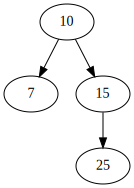

In [16]:
# Define una función para realizar un recorrido en orden y capturar la
# estructura del árbol.
def in_order_traversal(node, result=None):
    if result is None:
        result = []
    if node:
        in_order_traversal(node.left, result)
        result.append(node.data)
        in_order_traversal(node.right, result)
    return result

# Añade el recorrido en orden a la clase BinaryTree.
BinaryTree.in_order_traversal = lambda self: in_order_traversal(self.root)

# Inicia pruebas para validar la eliminación en el árbol.
bt = BinaryTree()

# Inserta nodos en el árbol.
for key in [10, 5, 20, 3, 7, 15, 25]:
    bt.insert(key)

# Realiza pruebas de eliminación.
print("Árbol original (en orden):", bt.in_order_traversal())

# Prueba 1: Elimina un nodo hoja.
bt.delete_node(3)
print("Después de eliminar el nodo hoja (3):", bt.in_order_traversal())

# Prueba 2: Elimina un nodo con un solo hijo.
bt.delete_node(20)
print("Después de eliminar el nodo con un hijo (20):", bt.in_order_traversal())

# Prueba 3: Elimina un nodo con dos hijos.
bt.delete_node(5)
print("Después de eliminar el nodo con dos hijos (5):", bt.in_order_traversal())

# Visualizar el árbol
dot = visualize_bt(bt)
dot

# Verifica la estructura del árbol después de cada eliminación. Los resultados
# impresos deberían reflejar la estructura correcta del árbol en cada caso.
